CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("fraudTrain.csv")

In [3]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
features = ['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt','city_pop', 'unix_time', 'merch_lat', 'merch_long']
target = 'is_fraud'

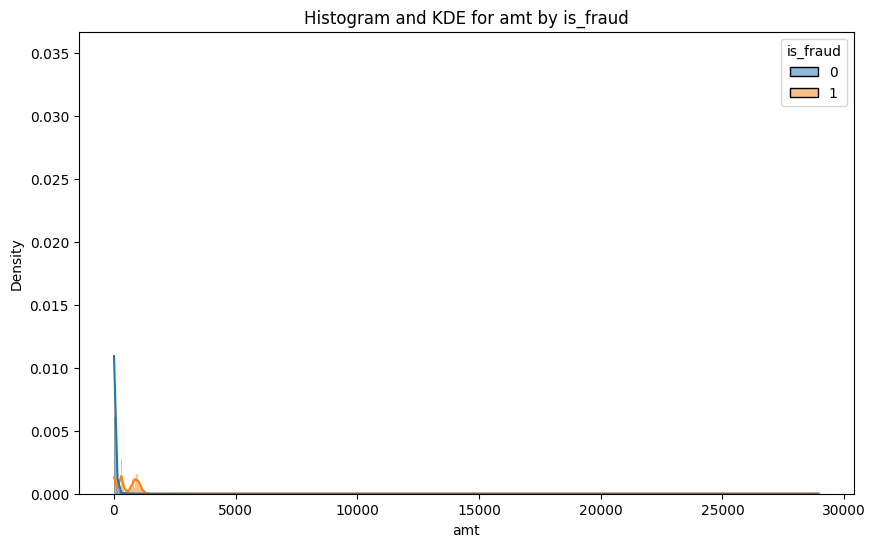

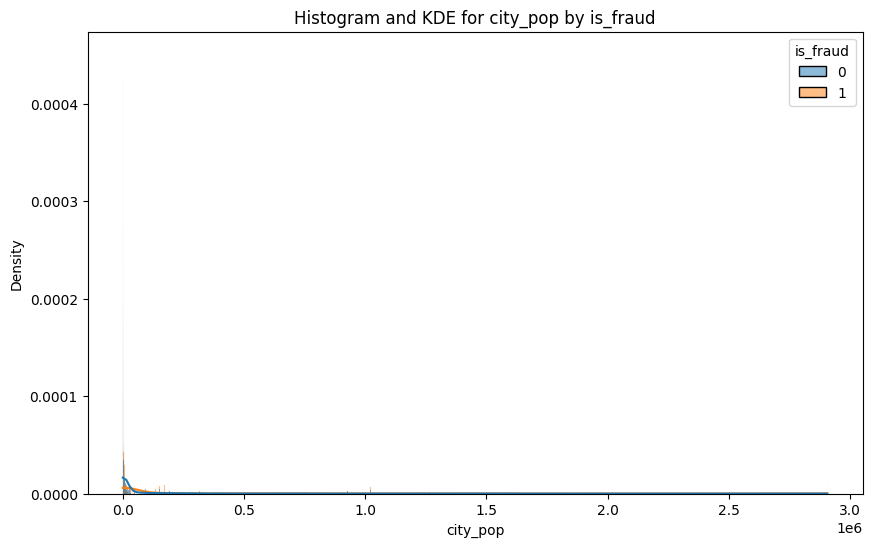

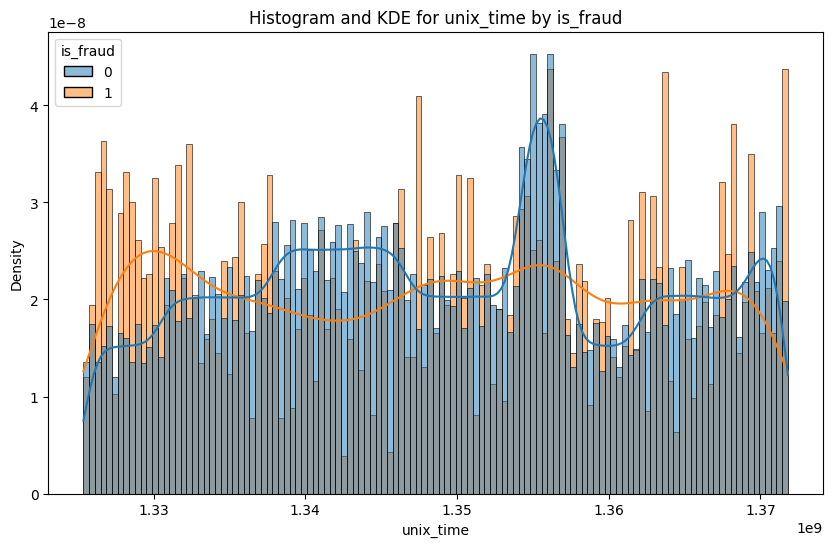

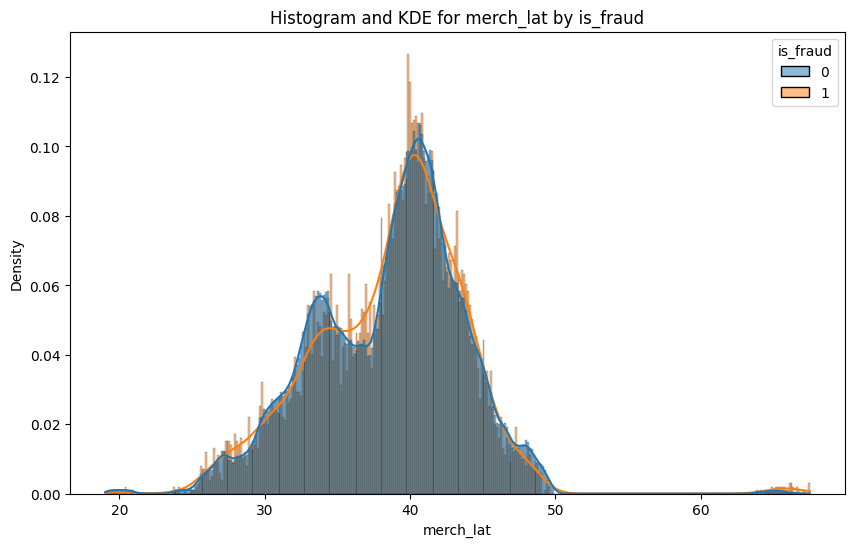

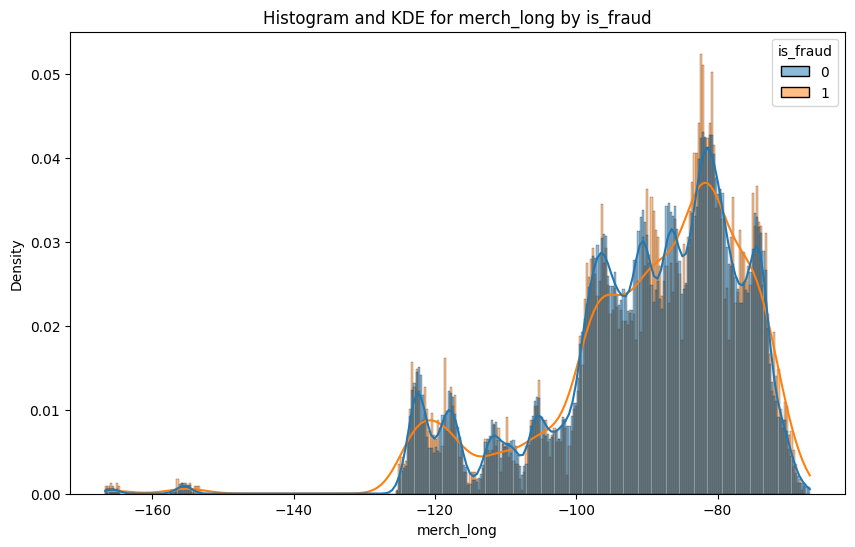

In [21]:
continuous_features = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

for feature in continuous_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=train_data, x=feature, hue=target, kde=True, stat="density", common_norm=False)
    plt.title(f'Histogram and KDE for {feature} by {target}')
    plt.show()

In [5]:
X = train_data[features]
y = train_data[target]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
numeric_features = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
categorical_features = ['merchant', 'category']

RANDOM FOREST REGRESSOR

In [15]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [16]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [19]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'city_pop',
                                                   'unix_time', 'merch_lat',
                                                   'merch_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
y_pred = clf.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.84      0.56      0.67      1520

    accuracy                           1.00    259335
   macro avg       0.92      0.78      0.84    259335
weighted avg       1.00      1.00      1.00    259335



LOGISTIC REGRESSION

In [25]:
numeric_features = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [26]:
categorical_features = ['merchant', 'category']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [28]:
clr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

In [29]:
clr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['amt', 'city_pop',
                                                   'unix_time', 'merch_lat',
                                                   'merch_long']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['merchant', 'category'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [30]:
y_pred = clr.predict(X_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257815
           1       0.00      0.00      0.00      1520

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



WE CAN SEE FROM ABOVE CLASSIFICATION REPORT OF BOTH THE MODELS THAT BOTH ARE WORKING GOOD SO WE CAN CHOOSE ANYONE OF THEM

In [32]:
import pickle

with open('random_forest_regessor_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)


In [33]:
test_data=pd.read_csv("fraudTest.csv")

In [34]:
with open('random_forest_regessor_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [35]:
features = ['amt', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'merchant', 'category']
X_test = test_data[features]

In [36]:
y_pred = model.predict(X_test)

In [37]:
test_data['predicted_is_fraud'] = y_pred

In [40]:
test_data.to_csv('predictions.csv', index=False)

In [41]:
print(test_data[['amt', 'merchant', 'category', 'predicted_is_fraud']].head())

     amt                              merchant        category  \
0   2.86                 fraud_Kirlin and Sons   personal_care   
1  29.84                  fraud_Sporer-Keebler   personal_care   
2  41.28  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  60.05                     fraud_Haley Group        misc_pos   
4   3.19                 fraud_Johnston-Casper          travel   

   predicted_is_fraud  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  


In [42]:
actual_data = pd.read_csv('fraudTest.csv')

predicted_data= pd.read_csv('predictions.csv')

In [45]:
y_true = actual_data['is_fraud']
y_pred = predicted_data['predicted_is_fraud']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate a classification report
report = classification_report(y_true, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.9976
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.79      0.50      0.61      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.75      0.81    555719
weighted avg       1.00      1.00      1.00    555719



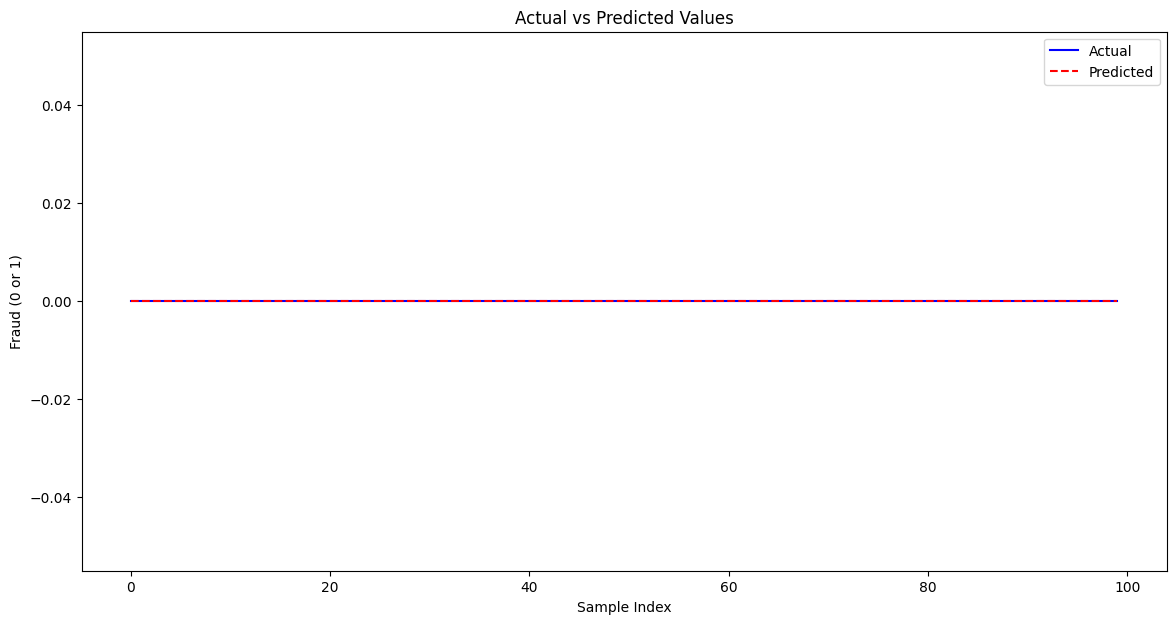

In [48]:
comparison_df = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})
sample_df = comparison_df.sample(n=100, random_state=42).reset_index(drop=True)
plt.figure(figsize=(14, 7))
plt.plot(sample_df.index, sample_df['Actual'], label='Actual', color='blue')
plt.plot(sample_df.index, sample_df['Predicted'], label='Predicted', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Fraud (0 or 1)')
plt.show()

FROM THE ABOVE GRAPH YOU CAN SEE THAT THE PREDICTED AND ACTUAL VALUES ARE OVERLAPPING EACH OTHER.

THANK YOU....